# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

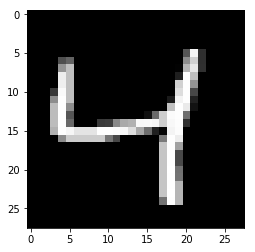

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [14]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=(None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, shape=(None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [15]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [16]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6934
Epoch: 1/20... Training loss: 0.6901
Epoch: 1/20... Training loss: 0.6868
Epoch: 1/20... Training loss: 0.6826
Epoch: 1/20... Training loss: 0.6772
Epoch: 1/20... Training loss: 0.6717
Epoch: 1/20... Training loss: 0.6639
Epoch: 1/20... Training loss: 0.6544
Epoch: 1/20... Training loss: 0.6451
Epoch: 1/20... Training loss: 0.6346
Epoch: 1/20... Training loss: 0.6236
Epoch: 1/20... Training loss: 0.6064
Epoch: 1/20... Training loss: 0.5925
Epoch: 1/20... Training loss: 0.5753
Epoch: 1/20... Training loss: 0.5586
Epoch: 1/20... Training loss: 0.5429
Epoch: 1/20... Training loss: 0.5233
Epoch: 1/20... Training loss: 0.5071
Epoch: 1/20... Training loss: 0.4904
Epoch: 1/20... Training loss: 0.4708
Epoch: 1/20... Training loss: 0.4565
Epoch: 1/20... Training loss: 0.4367
Epoch: 1/20... Training loss: 0.4174
Epoch: 1/20... Training loss: 0.4079
Epoch: 1/20... Training loss: 0.3943
Epoch: 1/20... Training loss: 0.3833
Epoch: 1/20... Training loss: 0.3644
E

Epoch: 1/20... Training loss: 0.1849
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1850
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1934
Epoch: 1/20... Training loss: 0.1833
Epoch: 1/20... Training loss: 0.1839
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1849
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1945
Epoch: 1/20... Training loss: 0.1838
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1905
Epoch: 1/20... Training loss: 0.1859
Epoch: 1/20... Training loss: 0.1836
Epoch: 1/20... Training loss: 0.1850
Epoch: 1/20... Training loss: 0.1831
Epoch: 1/20... Training loss: 0.1836
E

Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1484
Epoch: 2/20... Training loss: 0.1475
Epoch: 2/20... Training loss: 0.1506
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1463
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1504
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1519
Epoch: 2/20... Training loss: 0.1470
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1461
Epoch: 2/20... Training loss: 0.1490
Epoch: 2/20... Training loss: 0.1496
Epoch: 2/20... Training loss: 0.1467
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1442
Epoch: 2/20... Training loss: 0.1488
Epoch: 2/20... Training loss: 0.1501
Epoch: 2/20... Training loss: 0.1456
Epoch: 2/20... Training loss: 0.1478
E

Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1406
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1280
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1287
Epoch: 3/20... Training loss: 0.1286
Epoch: 3/20... Training loss: 0.1301
Epoch: 3/20... Training loss: 0.1290
E

Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1244
E

Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1197
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1172
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1119
E

Epoch: 6/20... Training loss: 0.1116
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1116
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1099
Epoch: 6/20... Training loss: 0.1105
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1129
E

Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1017
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1010
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1098
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.0994
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1000
Epoch: 6/20... Training loss: 0.1043
E

Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0965
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0972
E

Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1031
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.1035
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0976
E

Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0914
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0997
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.1020
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0934
E

Epoch: 9/20... Training loss: 0.1003
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0930
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0954
E

Epoch: 10/20... Training loss: 0.0902
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.1004
Epoch: 10/20... Training loss: 0.0897
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0990
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0985
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0984
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0979
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0980
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0990
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0982
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0989
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0901
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0979
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0895
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0991
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0898
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0973
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0983
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0985
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0892
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0866
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0984
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0975
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

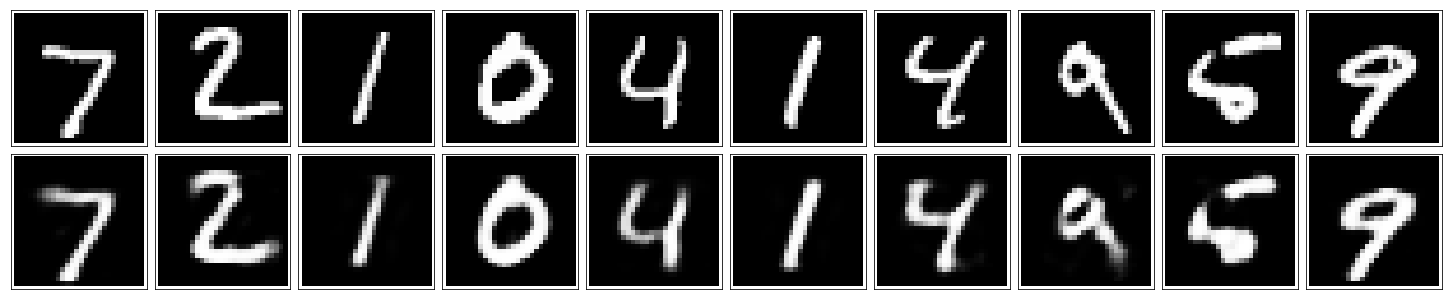

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [18]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.